In [2]:
pdf_path  = "human-nutrition-text.pdf"

In [3]:
# Requires !pip install PyMuPDF, see: https://github.com/pymupdf/pymupdf
import fitz # (pymupdf, found this is better than pypdf for our use case, note: licence is AGPL-3.0, keep that in mind if you want to use any code commercially)
from tqdm.auto import tqdm # for progress bars, requires !pip install tqdm 

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip() # note: this might be different for each doc (best to experiment)

    # Other potential text formatting functions can go here
    return cleaned_text

# Open PDF and get lines/pages
# Note: this only focuses on text, rather than images/figures etc
def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """
    Opens a PDF file, reads its text content page by page, and collects statistics.

    Parameters:
        pdf_path (str): The file path to the PDF document to be opened and read.

    Returns:
        list[dict]: A list of dictionaries, each containing the page number
        (adjusted), character count, word count, sentence count, token count, and the extracted text
        for each page.
    """
    doc = fitz.open(pdf_path)  # open a document
    
    print("doc is " , doc)
    print("doc is " , dict(enumerate(doc)))
    
    pages_and_texts = [] # an array which will have dict in it.....or a array of objects 
    # or we can say a list containing dicts.....since return type is list[dict]
    
    for page_number, page in tqdm(enumerate(doc)):  # iterate the document pages
        text = page.get_text()  # get plain text encoded as UTF-8
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 41,  # adjust page numbers since our PDF starts on page 42
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[40:41]

# pages_and_texts returns
# [
#     {
#         "page_number": 1,
#         "page_char_count": 1500,
#         "page_word_count": 250,
#         "text": "Once upon a time..."
#     },
#     {
#         "page_number": 2,
#         "page_char_count": 1700,
#         "page_word_count": 300,
#         "text": "The journey continued..."
#     }
# ]



doc is  Document('human-nutrition-text.pdf')
doc is  {0: page 0 of human-nutrition-text.pdf, 1: page 1 of human-nutrition-text.pdf, 2: page 2 of human-nutrition-text.pdf, 3: page 3 of human-nutrition-text.pdf, 4: page 4 of human-nutrition-text.pdf, 5: page 5 of human-nutrition-text.pdf, 6: page 6 of human-nutrition-text.pdf, 7: page 7 of human-nutrition-text.pdf, 8: page 8 of human-nutrition-text.pdf, 9: page 9 of human-nutrition-text.pdf, 10: page 10 of human-nutrition-text.pdf, 11: page 11 of human-nutrition-text.pdf, 12: page 12 of human-nutrition-text.pdf, 13: page 13 of human-nutrition-text.pdf, 14: page 14 of human-nutrition-text.pdf, 15: page 15 of human-nutrition-text.pdf, 16: page 16 of human-nutrition-text.pdf, 17: page 17 of human-nutrition-text.pdf, 18: page 18 of human-nutrition-text.pdf, 19: page 19 of human-nutrition-text.pdf, 20: page 20 of human-nutrition-text.pdf, 21: page 21 of human-nutrition-text.pdf, 22: page 22 of human-nutrition-text.pdf, 23: page 23 of human-nu

1208it [00:00, 1242.64it/s]


[{'page_number': -1,
  'page_char_count': 908,
  'page_word_count': 152,
  'page_sentence_count_raw': 3,
  'page_token_count': 227.0,
  'text': 'This work is licensed under a Creative Commons Attribution 4.0  International License. Human Nutrition by the\xa0University of Hawai’i  at Mānoa Food Science and Human Nutrition Program. Download  this  book  for  free  at:  \xa0http://pressbooks.oer.hawaii.edu/ humannutrition/  —  This Open Educational Resource textbook was also inspired by:  Kansas State University Human Nutrition | goo.gl/vOAnR // CC  BY 3.0  Edited and Reviewed by  Carolyn Donohoe-Mather – University of Hawai’i at Mānoa, Chapter  reviewer  Cecille Farnum — Ryerson University, Copyeditor  Changqi Leu — San Diego State University, Chapter reviewer  Billy Meinke — University of Hawai’i at Mānoa, Project manager  Paula Parslow — Private, Copyeditor  Trina Robertson — Saddleback College, Chapter reviewer  Allison Tepper — American University, Chapter reviewer  Front Cover Photo

In [4]:
import random 

random.sample(pages_and_texts,k=3)

[{'page_number': 1082,
  'page_char_count': 1294,
  'page_word_count': 220,
  'page_sentence_count_raw': 16,
  'page_token_count': 323.5,
  'text': '• Death  There are no clear treatments for food allergies. Epinephrine is  sometimes used to control severe reactions, and individuals with  known and dangerous allergies may get prescriptions for self- injectable devices. The only certain way to avoid allergic reactions  to food is to avoid the foods that cause them. Beyond avoidance,  this can mean reading food labels carefully, or even calling  manufacturers for product information.  Ninety percent of food allergies are caused by these eight foods:  1. Milk  2. Eggs  3. Peanuts  4. Tree nuts  5. Fish  6. Shellfish  7. Wheat  8. Soy  The prevalence of food allergies is a complex and growing problem.  In response to this situation, the National Institute of Allergy and  Infectious  Diseases  (NIAID)  collaborated  with  thirty-four  professional organizations, federal agencies, and patien

In [5]:
# !pip install spacy
from spacy.lang.en import English

nlp = English()

# add a sentencier pipeline .

nlp.add_pipe("sentencizer")

#create doc instance as an example

doc = nlp("this is a sentence . This another sentence. I like elephant.")

assert len(list(doc.sents)) == 3

list(doc.sents)

[this is a sentence ., This another sentence., I like elephant.]

In [6]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
    
    # nlp(item["text"]) → This processes the text using spaCy’s NLP pipeline.
    # .sents → Extracts the sentences from the processed text.
    # list() → Converts the sentences into a standard Python list for easier manipulation.
    # 🧠 Note: The extracted sentences are not regular Python strings yet; they are Span objects (spaCy's datatype).
    
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    item["page_sentence_count_spacy"] = len(item["sentences"])
    
    # This converts each Span object into a string for compatibility and easier text manipulation.


100%|██████████| 1208/1208 [00:01<00:00, 671.04it/s]


In [7]:
import pandas as pd
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


In [8]:
#Define split sixw to turn groups of sentences into chunks.
num_sentence_chunk_size = 10

#create a function to split lists of texts recursively into chink size

#EG [20] -> [10 ,10 ] OR [25] -> [10,10,5]

def split_list(input_list : list[str],
               slice_size : int = num_sentence_chunk_size ) -> list[list[str]]:
    return [input_list[i: i + slice_size] for i in range(0,len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [9]:
#loop thorugh pages and texts and split sentences into chunks 

for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                        slice_size=num_sentence_chunk_size)
    
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 1208/1208 [00:00<00:00, 403208.60it/s]


In [10]:
random.sample(pages_and_texts , k=1)

[{'page_number': 388,
  'page_char_count': 1587,
  'page_word_count': 272,
  'page_sentence_count_raw': 14,
  'page_token_count': 396.75,
  'text': 'Even a slight change in blood pH can affect body functions. Recall  that acidic conditions can cause protein denaturation, which stops  proteins from functioning. The body has several systems that hold  the blood pH within the normal range to prevent this from  happening. One of these is the circulating albumin. Albumin is  slightly acidic, and because it is negatively charged it balances the  many positively charged molecules, such as protons (H+), calcium,  potassium, and magnesium which are also circulating in the blood.  Albumin acts as a buffer against abrupt changes in the  concentrations of these molecules, thereby balancing blood pH and  maintaining the status quo. The protein hemoglobin also  participates in acid-base balance by binding and releasing protons.  Transport  Albumin and hemoglobin also play a role in molecular transpo

In [11]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


In [12]:
import re

#split each chunk into its own item
pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # join the sentences together into a paragraph like structure , aka join the list of sentences into one paragraph
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
      
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        
        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        
        #get some stats on our chunk
        
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] =len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4 #1 token =~ 4 chars
        
        pages_and_chunks.append(chunk_dict)
        
len(pages_and_chunks)

100%|██████████| 1208/1208 [00:00<00:00, 45459.78it/s]


1843

In [13]:
random.sample(pages_and_chunks , k=1)

[{'page_number': 337,
  'sentence_chunk': 'functions eicosanoids serve in the body, their primary function is to regulate inflammation. Without these hormones the body would not be able to heal wounds, fight infections, or fight off illness each time a foreign germ presented itself. Eicosanoids work together with the body’s immune and inflammatory processes to play a major role in several important body functions, such as circulation, respiration, and muscle movement. Attain the Omega-3 and Omega-6 Balance As our food choices evolve, the sources of omega-6 fatty acids in our diets are increasing at a much faster rate than sources of omega-3 fatty acids. Omega-3s are plentiful in diets of non- processed foods where grazing animals and foraging chickens roam free, eating grass, clover, alfalfa, and grass-dwelling insects. In contrast, today’s western diets are bombarded with sources of omega-6. For example, we have oils derived from seeds and nuts and from the meat of animals that are fe

In [14]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


In [15]:
min_token_length = 30
# the minimum token length may vary with experimentation ,  so we need to experiment 
# and see which token length doesnt contain much informatation we need

for row in df[df["chunk_token_count"] <=min_token_length ].sample(5).iterrows():
    print(f"chunk token count : {row[1]["chunk_token_count"]} |  text ; {row[1]["sentence_chunk"]}")

chunk token count : 20.25 |  text ; Published 2002. Accessed December 2, 2017. Pacific Based Dietary Guidelines | 761
chunk token count : 19.25 |  text ; 2018). Centers for Disease Control and 998 | The Causes of Food Contamination
chunk token count : 13.0 |  text ; Accessed October 5, 2017. 540 | Fat-Soluble Vitamins
chunk token count : 3.75 |  text ; 806 | Pregnancy
chunk token count : 17.75 |  text ; Table 6.1 Essential and Nonessential Amino Acids Defining Protein | 365


In [16]:

pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length ].to_dict(orient="records")
pages_and_chunks_over_min_token_len

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5},
 {'page_number': -37,
  'sentence_chunk': 'Contents Preface University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program xxv About the Contributors University of Hawai‘i at Mānoa Food S

In [17]:
random.sample(pages_and_chunks_over_min_token_len , k=1)
# these chunks are over 30 tokens

[{'page_number': 301,
  'sentence_chunk': 'A professional swimmer must consume large amounts of food energy to meet the demands of swimming long distances, so eating fat-rich foods makes sense. In contrast, if a person who leads a sedentary lifestyle eats the same high-density fat foods, they will intake more fat calories than their body requires within just a few bites. Use caution—consumption of calories over and beyond energy requirements is a contributing factor to obesity. The Role of Lipids in Food | 301',
  'chunk_char_count': 472,
  'chunk_word_count': 78,
  'chunk_token_count': 118.0}]

In [18]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",
                                      device="cpu")

# create a list of sentences

sentences = ["The sentence transformer library provides an easy way t create embeddings. " ,
             "sentences can be embedded one by one or in a list",
             "I like horses !"]

# sentences are encoded/embedded by calling model.encode()

embeddings = embedding_model.encode(sentences)

embedding_dict = dict(zip(sentences , embeddings))

# see the embedddings

for sentence , embedding in embedding_dict.items():
    print(f"sentence : {sentence}")
    print(f"embedding : {embedding}")
    print(f"")

sentence : The sentence transformer library provides an easy way t create embeddings. 
embedding : [-3.03859804e-02  1.93645656e-02 -2.09665783e-02  5.70090264e-02
 -1.71133745e-02 -5.64158941e-03  6.67294813e-03 -6.14196137e-02
  2.45750826e-02 -2.86505800e-02  3.86588201e-02  5.88028207e-02
 -4.05226015e-02  1.67453419e-02  3.99703123e-02 -5.03052920e-02
  4.79636863e-02  7.06954394e-03 -9.18876193e-03  9.14793462e-03
  4.31360081e-02  3.24176587e-02  3.09136920e-02  2.66764648e-02
 -1.99427325e-02 -2.30906140e-02 -2.51268107e-03 -4.25682478e-02
  5.65224886e-02 -1.46105764e-02 -3.37453187e-02 -1.13715483e-02
  5.54521345e-02 -3.01220221e-04  8.70110796e-07  6.95457729e-03
 -4.20378409e-02 -1.33489934e-03  1.87939778e-02 -1.24930544e-03
  5.12322448e-02 -4.71836962e-02  1.74600184e-02  5.31935394e-02
 -3.85256894e-02 -7.68404966e-03  4.70925979e-02  1.72506608e-02
  9.07450393e-02  4.68657948e-02 -1.91072449e-02 -3.97632495e-02
  3.78508493e-03 -8.98976345e-03 -1.72669254e-02  2.2141

In [19]:
embedding = embedding_model.encode("My favourite animal is the cow !")
embedding

array([-1.45473592e-02,  7.66727254e-02, -2.85872295e-02, -3.31283323e-02,
        3.65210623e-02,  4.78570722e-02, -7.08107650e-02,  1.62834115e-02,
        1.93443578e-02, -2.80482210e-02, -2.91746985e-02,  5.11310101e-02,
       -3.28720249e-02, -8.98758043e-03, -1.03672612e-02, -3.15488353e-02,
        4.22783941e-02, -9.13281739e-03, -1.94017384e-02,  4.35689166e-02,
       -2.31997799e-02,  4.29883189e-02, -1.72393620e-02, -2.01372448e-02,
       -3.13574336e-02,  8.08168482e-03, -2.06725318e-02, -2.27869470e-02,
        2.44812835e-02,  1.71967912e-02, -6.26672581e-02, -7.54797161e-02,
        3.57422121e-02, -5.46569051e-03,  1.24730343e-06, -7.63203343e-03,
       -3.53222340e-02,  1.91327129e-02,  3.99045646e-02,  2.11730343e-03,
        1.64565984e-02,  9.84052476e-03, -1.80700570e-02,  9.33834538e-03,
        3.23482789e-02,  5.84785193e-02,  4.23187539e-02,  1.62091162e-02,
       -9.14911479e-02,  1.82304922e-02, -5.25728893e-03, -7.81019405e-03,
       -3.47644351e-02, -

In [20]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# import texts and embedding df
text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embedding_df.csv")

# convert embedding column back to np.array ( it got converted to string when it saved to CSV , but need numerical not string)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x:np.fromstring(x.strip("[]") ,sep=" "))
#sep means seperation bcz there is 1 spaces in between so we use " "

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].to_list(),axis=0 ),dtype=torch.float32).to(device)

#convert the texts and embedding df into list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df[:3]

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.0,"[0.0674242899, 0.0902281702, -0.00509548699, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.5,"[0.0552156232, 0.0592139959, -0.0166167356, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.5,"[0.0279801786, 0.0339813903, -0.0206426717, 0...."


In [21]:
#create model

from sentence_transformers import util , SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2" , device=device)



In [22]:
# 1. Define the query

query = "macronutrients functions"
print(f"query : {query}")

#2.embed the query 

# NOTE : its important to embedd the query with the same embedding model u embedd ur passgaes
# if u want to use a new model for query , u need to embedd ur pasages first with that model

query_embedding= embedding_model.encode(query ,convert_to_tensor=True).to(device)

#3. Get similarity scores with the dot product ( use cosine similairity if the outputs of model arent normalized)

from time import perf_counter as timer 

start_time= timer()
dot_scores = util.dot_score(a = query_embedding , b=embeddings)[0]
end_time = timer()

print(f'[INFO] time taken to get scores on {len(embeddings)} , embeddings : {end_time-start_time:.5f} seconds.')

#4. Get the top-k results with most accuracy not all the results or most similarity
top_results_dot_product = torch.topk(dot_scores , k=5)
top_results_dot_product

query : macronutrients functions
[INFO] time taken to get scores on 1680 , embeddings : 0.00026 seconds.


torch.return_types.topk(
values=tensor([0.6926, 0.6738, 0.6646, 0.6536, 0.6473], device='cuda:0'),
indices=tensor([42, 47, 41, 51, 46], device='cuda:0'))

In [23]:
pages_and_chunks[46]

{'page_number': 7,
 'sentence_chunk': 'Figure 1.1 The Macronutrie nts: Carbohydrat es, Lipids, Protein, and Water Proteins Proteins are macromolecules composed of chains of subunits called amino acids. Amino acids are simple subunits composed of carbon, oxygen, hydrogen, and nitrogen. Food sources of proteins include meats, dairy products, seafood, and a variety of different plant- based foods, most notably soy. The word protein comes from a Greek word meaning “of primary importance,” which is an apt description of these macronutrients; they are also known colloquially as the “workhorses” of life. Proteins provide four kilocalories of energy per gram; however providing energy is not protein’s most important function. Proteins provide structure to bones, muscles and skin, and play a role in conducting most of the chemical reactions that take place in the body. Scientists estimate that greater than one-hundred thousand different proteins exist within the human body. The genetic codes in 

In [24]:
import textwrap

def print_wrapped(text , wrap_length=80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrap_length)

In [25]:
print(f'query : {query} \n')
print("results:")

#loop throughh zipped together scores and indicies torch.ThroughputBenchmark

for score , idx in zip(top_results_dot_product[0] , top_results_dot_product[1]):
    print(f'score : {score:.4f}')
    print("text : ")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"page number : {pages_and_chunks[idx]["page_number"]}")
    print('\n')

query : macronutrients functions 

results:
score : 0.6926
text : 
Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates a

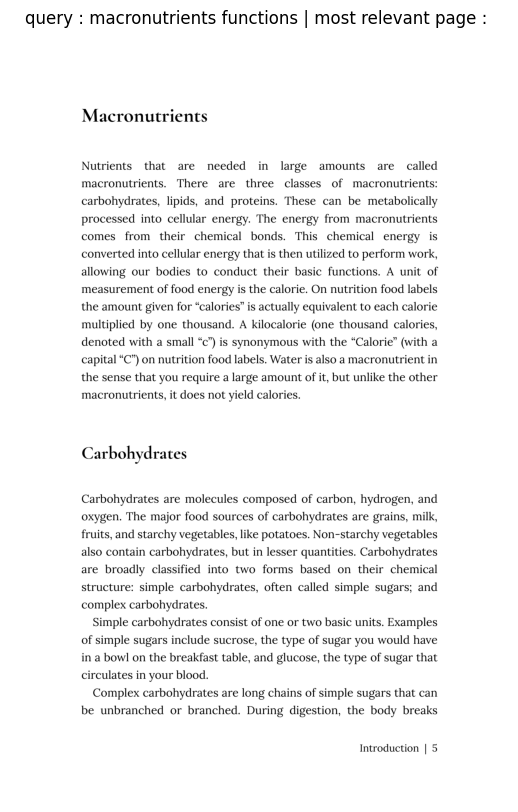

In [26]:
import fitz

pdf_path = "human-nutrition-text.pdf"

doc = fitz.open(pdf_path)
page = doc.load_page(5+41)

#get the image of the pages_and_chunks
img = page.get_pixmap(dpi=300)

#save the image ( optional)
# img.save("output_image_0.jpg")

doc.close()

#convert the pixmap to a numpy array

img_array = np.frombuffer(img.samples_mv , dtype=np.uint8).reshape((img.h,img.w,img.n))

#Display the image using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"query : {query} | most relevant page : ")
plt.axis("off")
plt.show()

In [27]:
def dot_product(vector1 , vector2):
    return torch.dot(vector1,vector2)

def cosine_similarity(v1,v2):
    dot_product = torch.dot(v1,v2)
    
    #get euclidean/L2 norm
    #its a mathemetical formula
    norm_vector1 = torch.sqrt(torch.sum(v1**2))
    norm_vector2 = torch.sqrt(torch.sum(v2**2))
    
    return dot_product/(norm_vector1*norm_vector2)

In [28]:
def retrieve_relevant_resources(query : str , 
                                embeddings : torch.tensor,
                                model : SentenceTransformer = embedding_model , 
                                n_resources_to_return : int =5 , 
                                print_time : bool = True):
    
    # embeds a query with model and returns top k scores and indices from embeddings
    
    #embed the query 
    
    query_embedding = model.encode(query , convert_to_tensor=True)
    
    #get the dot scors on embedding ( bcz our embeddings are already normalized)
    
    start_time = timer()
    dot_scores = util.dot_score(query_embedding , embeddings)[0]
    end_time = timer()
    
    if print_time:
        print(f"[INFO] time taken to get scores on ({len(embeddings)} embeddings : {end_time - start_time :.5f}) seconds. ")
        
    scores , indices = torch.topk(input=dot_scores ,
                                  k=n_resources_to_return
                                  )
    
    return scores,indices


def print_top_result_and_scores(query : str ,
                                embeddings : torch.tensor,
                                pages_and_chunks : list[dict] = pages_and_chunks,
                                n_resources_to_return : int = 5
                                ):
    
    scores , indicies = retrieve_relevant_resources(query=query , 
                                                    embeddings=embeddings,
                                                    n_resources_to_return=n_resources_to_return)
    
    for score , idx in zip(scores  , indicies):
        print(f'score : {score:.4f}')
        print("text : ")
        print(pages_and_chunks[idx]["sentence_chunk"])
        print(f"page number : {pages_and_chunks[idx]["page_number"]}")
        print('\n')

In [29]:
query="food high in fiber"
retrieve_relevant_resources( query=query, embeddings=embeddings)
print_top_result_and_scores(query=query , embeddings=embeddings)

[INFO] time taken to get scores on (1680 embeddings : 0.00007) seconds. 
[INFO] time taken to get scores on (1680 embeddings : 0.00007) seconds. 
score : 0.7015
text : 
• Change it up a bit and experience the taste and satisfaction of other whole grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
page number : 276


score : 0.6864
text : 
Dietary fiber is categorized as either water-soluble or insoluble. Some examples of soluble fibers are inulin, pectin, and guar gum and they are found in peas, beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a few dietary sources of them are whole-grain foods, flax, cauliflower, and avocados. Cellulose is the most abundant fiber in plants, making up the cell walls and providing structure. Soluble fibers are more easily accessible to bacteria

In [30]:
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/(2**30))

print(f"available gpu memory : {gpu_memory_gb} GB")

available gpu memory : 4 GB


In [33]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM 
from transformers.utils import is_flash_attn_2_available 
use_quantization_config = True  # Set to True if you want to use quantization

# 1. Create quantization config for smaller model loading (optional)
# Requires %pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires %pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention 
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = "google/gemma-2-2b-it"

print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model) 
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
    device_map="auto",  # Efficient GPU memory usage
    attn_implementation=attn_implementation
)

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU 
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2-2b-it


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `llm_int8_enable_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [ ]:
input_text = "what are the macronutrients ?"

print(f"input text : \n {input_text}")

dialog_template = [
    {
        "role" : "user",
        "content":input_text
    }
]

#apply the chat template 

prompt = tokenizer.apply_chat_template(conversation=dialog_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

print(f"prompt (formatted) : \n {prompt}")

In [ ]:
tokenizer

In [ ]:
from transformers import GenerationConfig

# Define a safe generation config
gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)

# Generate output
outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    attention_mask=input_ids['attention_mask'],
    generation_config=gen_config
)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [ ]:
import random

query = random.choice(query_list)

print(f"query : {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

In [ ]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """
You are an expert assistant trained to provide clear, detailed, and well-structured explanations. Follow these steps to generate the best possible answer:

1. **Extract Relevant Passages:** Identify and extract key information from the provided context that directly relates to the user's query.
2. **Formulate a Detailed Answer:** Using the extracted information, craft an informative and well-structured response that is clear, concise, and explanatory.  
3. **Maintain the Ideal Answer Style:** Follow the example responses below to ensure your answer is detailed, accurate, and engaging.  

### Example 1:
**Query:** What are the fat-soluble vitamins?  
**Answer:** The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with dietary fats and stored in the body's fatty tissues and liver. Each plays a distinct role: Vitamin A supports vision and immune function, Vitamin D aids calcium absorption and bone health, Vitamin E protects cells from oxidative stress, and Vitamin K is crucial for blood clotting and bone strength.

### Example 2:
**Query:** What are the causes of type 2 diabetes?  
**Answer:** Type 2 diabetes is linked to lifestyle factors such as excessive caloric intake, poor diet, and lack of physical activity. Diets rich in refined sugars and unhealthy fats contribute to insulin resistance, where cells no longer respond effectively to insulin. Over time, this impairs the pancreas’s ability to regulate blood sugar, leading to type 2 diabetes. Maintaining a balanced diet and staying active can significantly reduce this risk.

### Example 3:
**Query:** What is the importance of hydration for physical performance?  
**Answer:** Hydration is vital for physical performance as water maintains blood volume, regulates body temperature, and facilitates nutrient and oxygen delivery. Proper hydration supports muscle function, endurance, and recovery. Without adequate water intake, dehydration can cause fatigue, cramps, and reduced performance. To optimize physical performance, it's important to drink water before, during, and after exercise.

---

Now follow these instructions to generate the answer:

**Context Items:**  
{context}  

**Relevant Passages (Extracted):** <extract relevant passages from the context here>  

**User Query:** {query}  
**Answer:** 
"""

    # Update base prompt with context items and query   
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
#outside the function
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

In [ ]:

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Define a safe generation config
gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)

# Generate output
outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    temperature = 0.7 , #the most imoportant feature , ranges between 0 and 1 , 
    #the lower the value the more determinstic the text, the higher the value the more creative the text.
    # it has to be experimented to find the best value we can use
    attention_mask=input_ids['attention_mask'],
    generation_config=gen_config
)
# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

In [ ]:
def ask(query, 
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True, 
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """
    #RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)
    
    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU 
       
        
    #AUGMENTATION
    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    
    
    #GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)



# Generate output
    outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    temperature=temperature,
    attention_mask=input_ids['attention_mask'],
    do_sample=True,
    max_new_tokens=max_new_tokens,
    generation_config=gen_config
)
    # outputs = llm_model.generate(**input_ids,
    #                              temperature=temperature,
    #                              do_sample=True,
    #                              max_new_tokens=max_new_tokens)
    
    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("<end_of_turn>" ,"").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text
    
    return output_text, context_items

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context 
answer, context_items = ask(query=query, 
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print(answer)
print(f"Context items:")
context_items

In [ ]:
# Recommended structure — Save both in one directory
# llm_model.save_pretrained("./RAG1_human_nutrition_pdf")
# tokenizer.save_pretrained("./RAG1_human_nutrition_pdf")


In [ ]:
# prompt = random.choice(query_list)
# print(f"Query: {query}")

# # Answer query with context and return context 
# answer, context_items = ask(query=prompt, 
#                             temperature=0.7,
#                             max_new_tokens=512,
#                             return_answer_only=False)

# print(f"Answer:\n")
# print(answer)